# Loading and using the models

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import load_model
import pickle
import lightgbm as lgbm
from astropy.visualization import hist
from scipy.stats import gaussian_kde

### Choosing the galaxy property

In [2]:
prop = 'stellar_mass'

### Loading data

In [3]:
df = pd.read_csv('../data/IllustrisTNG.csv')
df.head()

,M_h,C_h,S_h,z_h,Delta3_h,X_h,Y_h,Z_h,stellar_mass,sSFR,radius,color,x_g,y_g,z_g
0,11.275434,1.138757,0.039342,0.848485,2.713123,125.975711,82.016016,31.715561,9.379874,-10.052209,0.399335,0.753916,125.975708,82.016014,31.715561
1,11.403508,0.962432,0.099441,1.030303,1.380642,154.909266,201.215344,111.204516,9.290157,-9.820166,0.361644,0.637918,154.909271,201.215347,111.204514
2,11.780484,1.048434,0.056187,0.484848,1.573290,28.812924,155.460047,161.308766,10.098295,-9.393343,0.382119,0.370548,28.812923,155.460052,161.308762
3,11.794834,1.027043,0.049529,1.393939,1.396696,180.292406,87.729242,4.053393,10.158817,-10.266439,0.587131,0.698915,180.292404,87.729240,4.053393
4,11.282836,0.894800,0.077483,1.212121,3.869009,24.234033,113.801063,138.395078,9.150318,-9.774971,0.400419,0.634539,24.234034,113.801064,138.395081


### Selecting the data

In [4]:
#RAW and SMOGN
data = np.array([df['M_h'], df['C_h'], df['S_h'], df['z_h'], df['Delta3_h']]).T
target = np.array([df[prop]]).T[:, 0]
data.shape, target.shape

((100, 5), (100,))

Pre-processing the data

In [5]:
mean_data = np.mean(data, axis = 0)
std_data = np.std(data, axis = 0)
mean_data, std_data

(array([11.5193223 ,  1.00425828,  0.05926026,  1.33818182,  3.30134054]),
 array([0.44408401, 0.11618406, 0.0335431 , 0.66813502, 2.9047534 ]))

In [6]:
data -= mean_data
data /= std_data

### Loading the models

In [7]:
#Raw
raw_NN = load_model('../models/'+prop+'/raw-NN.h5')
raw_kNN = pickle.load(open('../models/'+prop+'/raw-kNN.sav', 'rb'))
raw_LGBM = lgbm.Booster(model_file = '../models/'+prop+'/raw-LGBM.txt')
raw_ERT = pickle.load(open('../models/'+prop+'/raw-ERT.pkl', 'rb'))
raw_stacked = pickle.load(open('../models/'+prop+'/raw-stacked.sav', 'rb'))
#SMOGN
SMOGN_NN = load_model('../models/'+prop+'/SMOGN-NN.h5')
SMOGN_kNN = pickle.load(open('../models/'+prop+'/SMOGN-kNN.sav', 'rb'))
SMOGN_LGBM = lgbm.Booster(model_file = '../models/'+prop+'/SMOGN-LGBM.txt')
SMOGN_ERT = pickle.load(open('../models/'+prop+'/SMOGN-ERT.pkl', 'rb'))
SMOGN_stacked = pickle.load(open('../models/'+prop+'/SMOGN-stacked.sav', 'rb'))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator KNeighborsRegressor from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator ExtraTreeRegressor from version 1.0.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.0.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LinearRegression from version 1.0.1 when using version 0.24.2. This might lead to breaking code or invalid resul

#### To get information about the used hyperparameters, use:

In [8]:
#NN
raw_NN.get_config()

{'name': 'sequential_4',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 5),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_12_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_12',
    'trainable': True,
    'batch_input_shape': (None, 5),
    'dtype': 'float32',
    'units': 32,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_13',
    'trainable': True,
    'dtype': 'float32',
    'units': 32,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias

In [9]:
#kNN
raw_kNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 29,
 'p': 1,
 'weights': 'uniform'}

In [10]:
#LGBM
#raw_LGBM.dump_model()

In [11]:
#ERT
#raw_ERT.get_params()

In [12]:
#Stacked
raw_stacked.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

### Predictions

In [13]:
#RAW
pred_raw_NN = raw_NN.predict(data)
pred_raw_kNN = raw_kNN.predict(data)
pred_raw_LGBM = raw_LGBM.predict(data)
pred_raw_ERT = raw_ERT.predict(data)
#SMOGN
pred_SMOGN_NN = SMOGN_NN.predict(data)
pred_SMOGN_kNN = SMOGN_kNN.predict(data)
pred_SMOGN_LGBM = SMOGN_LGBM.predict(data)
pred_SMOGN_ERT = SMOGN_ERT.predict(data)

### PDF comparison

Text(0.5, 1.0, 'PDF comparison: Raw predictions')

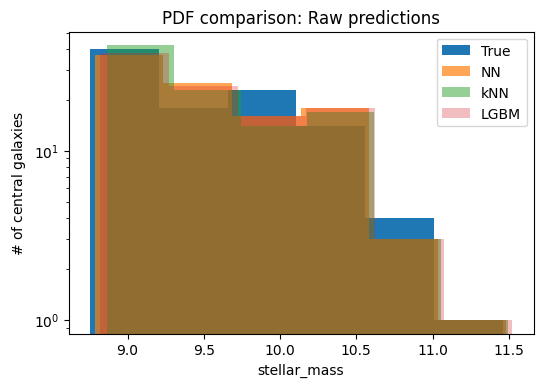

In [14]:
#RAW
plt.figure(dpi = 100)
hist(target, bins = 'scott', label = 'True')
hist(pred_raw_NN, bins = 'scott', alpha = 0.7, label = 'NN')
hist(pred_raw_kNN, bins = 'scott', alpha = 0.5, label = 'kNN')
hist(pred_raw_LGBM, bins = 'scott', alpha = 0.3, label = 'LGBM')
plt.yscale('log')
plt.legend()
plt.ylabel(r'$\#$ of central galaxies')
plt.xlabel(prop)
plt.title('PDF comparison: Raw predictions')

Text(0.5, 1.0, 'PDF comparison: SMOGN predictions')

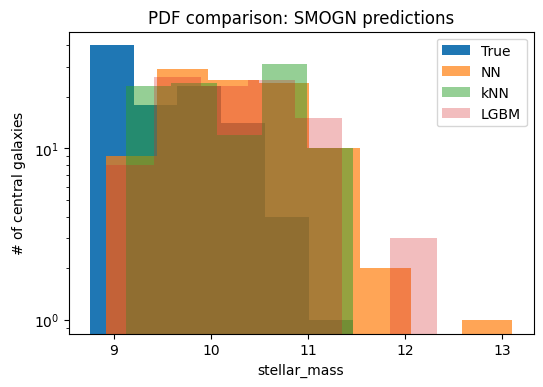

In [15]:
#SMOGN => They are not 'so good' because we have just a small fraction of the objects
plt.figure(dpi = 100)
hist(target, bins = 'scott', label = 'True')
hist(pred_SMOGN_NN, bins = 'scott', alpha = 0.7, label = 'NN')
hist(pred_SMOGN_kNN, bins = 'scott', alpha = 0.5, label = 'kNN')
hist(pred_SMOGN_LGBM, bins = 'scott', alpha = 0.3, label = 'LGBM')
plt.yscale('log')
plt.legend()
plt.ylabel(r'$\#$ of central galaxies')
plt.xlabel(prop)
plt.title('PDF comparison: SMOGN predictions')

### Data for the stacked models

In [16]:
data_stacked_raw = np.array([pred_raw_NN[:,0], pred_raw_kNN, pred_raw_LGBM, pred_raw_ERT]).T
data_stacked_SMOGN = np.array([pred_SMOGN_NN[:,0], pred_SMOGN_kNN, pred_SMOGN_LGBM, pred_SMOGN_ERT]).T

### Predictions for the stacked models

In [17]:
pred_raw_stacked = raw_stacked.predict(data_stacked_raw)
pred_SMOGN_stacked = SMOGN_stacked.predict(data_stacked_SMOGN)

### PDF comparison for the stacked models

Text(0.5, 1.0, 'PDF comparison: Raw predictions')

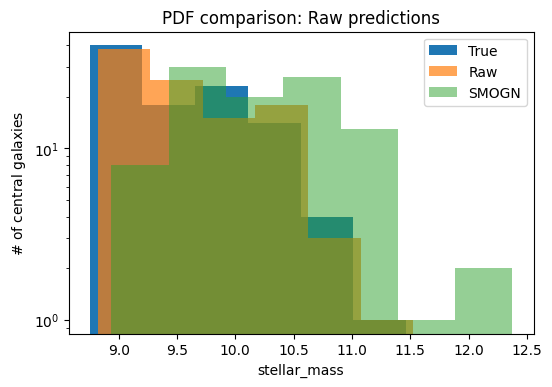

In [18]:
plt.figure(dpi = 100)
hist(target, bins = 'scott', label = 'True')
hist(pred_raw_stacked, bins = 'scott', alpha = 0.7, label = 'Raw')
hist(pred_SMOGN_stacked, bins = 'scott', alpha = 0.5, label = 'SMOGN')
plt.yscale('log')
plt.legend()
plt.ylabel(r'$\#$ of central galaxies')
plt.xlabel(prop)
plt.title('PDF comparison: Raw predictions')

### Linear $\times$ linear comparison

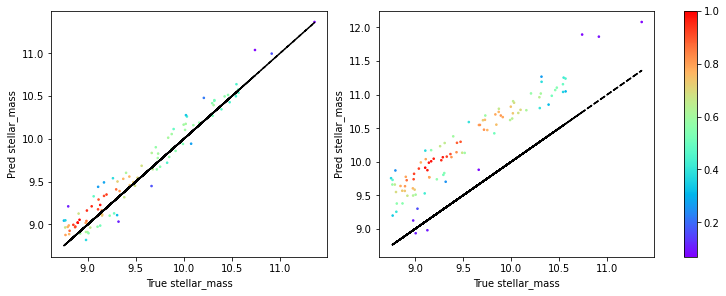

In [19]:
fig, axs = plt.subplots(1, 2, figsize = (10, 4), constrained_layout=True)

x = target
y = pred_raw_stacked
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
axs[0].plot(target, target, '--k', label = r'True $\times$ True')
im00 = axs[0].scatter(x, y, c = z/max(z), s = 10, cmap = 'rainbow', marker = '.')
axs[0].set_ylabel('Pred '+prop)
axs[0].set_xlabel('True '+prop)

x = target
y = pred_SMOGN_stacked
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
axs[1].plot(target, target, '--k', label = r'True $\times$ True')
axs[1].scatter(x, y, c = z/max(z), s = 10, cmap = 'rainbow', marker = '.')
axs[1].set_ylabel('Pred '+prop)
axs[1].set_xlabel('True '+prop)

fig.colorbar(im00, ax = axs)

One more time: notice that the SMOGN results are shifted because we have a small dataset. Using more data, the points that are translated to fill the poor regions will be equilibrated to create the overall distribution.